##### Prediksi Asphaltene menggunakan *Machine Learning* dengan metode *Bayesian Network*

## Tugas Akhir

* Nama : Irfan Dino
* NPM : 163210109
* Pembimbing : Fiki Hidayat S.T., M.Eng.
* Tahun : 2021

In [1]:
# Input data set
Address = r'D:\Tugas Akhir\TugasAkhirPy\Data Set\Data Set.xls'
import pandas as pd
data_set = pd.read_excel(Address)

In [2]:
data_set

,API,Tekanan,Temperatur,H2S*,N2*,CO2*,C1*,C2*,C3*,i-C4*,...,C6,C7,C7+,C30+,C33+,SG,Average MW Oil,Asp. Precipitation,References,Tab
0,19.00,1014.7,212.0,34.08,28.013,44.01,16.043,30.07,44.097,58.124,...,1.62,2.73,47.96,12.46,10.45,0.9594,203.8,0.403000,burke1990,tabel 5
1,19.00,2014.7,212.0,34.08,28.013,44.01,16.043,30.07,44.097,58.124,...,1.62,2.73,47.96,12.46,10.45,0.9594,203.8,1.037000,burke1990,tabel 6
2,19.00,3034.7,212.0,34.08,28.013,44.01,16.043,30.07,44.097,58.124,...,1.62,2.73,47.96,12.46,10.45,0.9594,203.8,0.742000,burke1990,tabel 7
3,19.00,4014.7,212.0,34.08,28.013,44.01,16.043,30.07,44.097,58.124,...,1.62,2.73,47.96,12.46,10.45,0.9594,203.8,0.402000,burke1990,tabel 8
4,24.00,514.7,218.0,34.08,28.013,44.01,16.043,30.07,44.097,58.124,...,3.16,4.71,66.86,12.35,9.91,0.9020,202.4,0.200000,burke1990,tabel 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,41.38,2014.7,158.5,34.08,28.013,44.01,16.043,30.07,44.097,58.124,...,2.58,16.20,69.65,0.16,NaN,0.8308,193.5,0.001707,TA dinda asmara2014,fig. 4.6
178,41.38,2214.7,158.5,34.08,28.013,44.01,16.043,30.07,44.097,58.124,...,2.58,16.20,69.65,0.16,NaN,0.8308,193.5,0.001426,TA dinda asmara2014,fig. 4.6
179,41.38,2414.7,158.5,34.08,28.013,44.01,16.043,30.07,44.097,58.124,...,2.58,16.20,69.65,0.16,NaN,0.8308,193.5,0.001108,TA dinda asmara2014,fig. 4.6
180,41.38,2614.7,158.5,34.08,28.013,44.01,16.043,30.07,44.097,58.124,...,2.58,16.20,69.65,0.16,NaN,0.8308,193.5,0.000754,TA dinda asmara2014,fig. 4.6


In [3]:
print(data_set)

       API  Tekanan  Temperatur   H2S*     N2*   CO2*     C1*    C2*     C3*  \
0    19.00   1014.7       212.0  34.08  28.013  44.01  16.043  30.07  44.097   
1    19.00   2014.7       212.0  34.08  28.013  44.01  16.043  30.07  44.097   
2    19.00   3034.7       212.0  34.08  28.013  44.01  16.043  30.07  44.097   
3    19.00   4014.7       212.0  34.08  28.013  44.01  16.043  30.07  44.097   
4    24.00    514.7       218.0  34.08  28.013  44.01  16.043  30.07  44.097   
..     ...      ...         ...    ...     ...    ...     ...    ...     ...   
177  41.38   2014.7       158.5  34.08  28.013  44.01  16.043  30.07  44.097   
178  41.38   2214.7       158.5  34.08  28.013  44.01  16.043  30.07  44.097   
179  41.38   2414.7       158.5  34.08  28.013  44.01  16.043  30.07  44.097   
180  41.38   2614.7       158.5  34.08  28.013  44.01  16.043  30.07  44.097   
181  41.38   2814.7       158.5  34.08  28.013  44.01  16.043  30.07  44.097   

      i-C4*  ...    C6     C7    C7+   

## Preproses Data

### 1. Cleaning Data

#### Remove column with single value and have few values

Columns that have a single observation or value are probably useless for modeling. These
columns or predictors are referred to zero-variance predictors as if we measured the variance
(average value from the mean), it would be zero. (Machine learning mastery)

... near-zero variance predictors or have the potential to have near zero variance
during the resampling process. These are predictors that have few unique values
(such as two values for binary dummy variables) and occur infrequently in the data.
| Pages 96-97, Feature Engineering and Selection, 2019.

The simplest approach for dealing with missing values is to remove entire predictor(s)
and/or sample(s) that contain missing values.
| Page 196, Feature Engineering and Selection, 2019.

In [4]:
data_set.isnull().sum()

API                    8
Tekanan                0
Temperatur             4
H2S*                   0
N2*                    0
CO2*                   0
C1*                    0
C2*                    0
C3*                    0
i-C4*                  0
n-C4*                  0
i-C5*                  0
n-C5*                 34
C6*                   34
C7*                   49
C7+*                  70
C30+*                 49
C33+*                 73
H2S                    0
N2                     0
CO2                    0
C1                     0
C2                     0
C3                     0
i-C4                   0
n-C4                   0
i-C5                   0
n-C5                   0
C6                     0
C7                    14
C7+                    0
C30+                  49
C33+                  73
SG                    44
Average MW Oil        49
Asp. Precipitation     0
References             0
Tab                    0
dtype: int64

In [5]:
list=['n-C5*','C6*','C7*','C7*','C7+*','C30+*','C33+*','C7','C30+','C33+','SG','Average MW Oil','References','Tab']
dataset=data_set.drop(list, axis=1)
dataset.describe()

,API,Tekanan,Temperatur,H2S*,N2*,CO2*,C1*,C2*,C3*,i-C4*,...,C1,C2,C3,i-C4,n-C4,i-C5,n-C5,C6,C7+,Asp. Precipitation
count,174.000000,182.000000,178.000000,1.820000e+02,1.820000e+02,182.00,182.000,1.820000e+02,1.820000e+02,1.820000e+02,...,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,33.169310,3020.055495,190.866966,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,35.300066,6.521297,4.415231,1.087681,2.788308,1.623736,2.166363,3.068418,35.584824,0.281354
std,7.157858,2098.902149,48.235101,1.425006e-14,7.125029e-15,0.00,0.000,3.562514e-15,7.125029e-15,7.125029e-15,...,13.582708,2.293370,1.337491,0.364411,1.069280,0.675391,0.934088,0.988820,17.863548,0.306418
min,19.000000,0.000000,90.000000,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,4.500000,1.790000,1.870000,0.590000,1.340000,0.700000,0.830000,1.620000,14.150000,0.000000
25%,33.600000,1325.000000,160.000000,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,19.710000,6.580000,3.900000,0.840000,2.020000,1.458000,1.590000,2.660000,22.195000,0.032500
50%,33.600000,2775.000000,176.000000,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,43.146000,7.159000,4.227000,1.078000,2.715000,1.458000,2.096000,2.917000,26.020000,0.250000
75%,38.000000,4250.000000,212.000000,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,43.146000,7.159000,5.340000,1.078000,3.243000,1.640000,2.114000,2.940000,47.960000,0.380000
max,59.500000,12500.000000,300.000000,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,53.130000,20.800000,8.730000,3.170000,5.820000,3.790000,4.750000,6.910000,72.920000,1.740000


#### Handling missing data

In [6]:
dataset.isnull().sum()

API                   8
Tekanan               0
Temperatur            4
H2S*                  0
N2*                   0
CO2*                  0
C1*                   0
C2*                   0
C3*                   0
i-C4*                 0
n-C4*                 0
i-C5*                 0
H2S                   0
N2                    0
CO2                   0
C1                    0
C2                    0
C3                    0
i-C4                  0
n-C4                  0
i-C5                  0
n-C5                  0
C6                    0
C7+                   0
Asp. Precipitation    0
dtype: int64

A simple and popular approach to data imputation involves using statistical methods to
estimate a value for a column from those values that are present, then replace all missing values
in the column with the calculated statistic. It is simple because statistics are fast to calculate
and it is popular because it often proves very efective. Common statistics calculated include:
* The column mean value.
* The column median value.
* The column mode value.
* A constant value.

In [7]:
# Imputasi class mean pada attribute Temperatur dan API

dataset['Temperatur'].fillna(dataset['Temperatur'].mean(),inplace=True)
dataset['API'].fillna(dataset['API'].mean(),inplace=True)
dataset.describe()

,API,Tekanan,Temperatur,H2S*,N2*,CO2*,C1*,C2*,C3*,i-C4*,...,C1,C2,C3,i-C4,n-C4,i-C5,n-C5,C6,C7+,Asp. Precipitation
count,182.000000,182.000000,182.000000,1.820000e+02,1.820000e+02,182.00,182.000,1.820000e+02,1.820000e+02,1.820000e+02,...,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,33.169310,3020.055495,190.866966,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,35.300066,6.521297,4.415231,1.087681,2.788308,1.623736,2.166363,3.068418,35.584824,0.281354
std,6.997885,2098.902149,47.699138,1.425006e-14,7.125029e-15,0.00,0.000,3.562514e-15,7.125029e-15,7.125029e-15,...,13.582708,2.293370,1.337491,0.364411,1.069280,0.675391,0.934088,0.988820,17.863548,0.306418
min,19.000000,0.000000,90.000000,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,4.500000,1.790000,1.870000,0.590000,1.340000,0.700000,0.830000,1.620000,14.150000,0.000000
25%,33.169310,1325.000000,160.000000,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,19.710000,6.580000,3.900000,0.840000,2.020000,1.458000,1.590000,2.660000,22.195000,0.032500
50%,33.600000,2775.000000,176.000000,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,43.146000,7.159000,4.227000,1.078000,2.715000,1.458000,2.096000,2.917000,26.020000,0.250000
75%,38.000000,4250.000000,212.000000,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,43.146000,7.159000,5.340000,1.078000,3.243000,1.640000,2.114000,2.940000,47.960000,0.380000
max,59.500000,12500.000000,300.000000,3.408000e+01,2.801300e+01,44.01,16.043,3.007000e+01,4.409700e+01,5.812400e+01,...,53.130000,20.800000,8.730000,3.170000,5.820000,3.790000,4.750000,6.910000,72.920000,1.740000


### remove low variance feature

In [8]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.05)
var_thres.fit(dataset)

VarianceThreshold(threshold=0.05)

In [9]:
var_thres.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [10]:
dataset.columns[var_thres.get_support()]

Index(['API', 'Tekanan', 'Temperatur', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3',
       'i-C4', 'n-C4', 'i-C5', 'n-C5', 'C6', 'C7+', 'Asp. Precipitation'],
      dtype='object')

In [11]:
constant_columns = [column for column in dataset.columns
                    if column not in dataset.columns[var_thres.get_support()]]

print(len(constant_columns))

9


In [12]:
for feature in constant_columns:
     print(feature)

H2S*
N2*
CO2*
C1*
C2*
C3*
i-C4*
n-C4*
i-C5*


In [13]:
new_data=dataset.drop(constant_columns,axis=1)
new_data.shape

(182, 16)

In [14]:
# Menggabungkan nilai C1-C7+ kedalam variabel baru dengan kategori non-HC_gas, Light, Intermediate, dan Heavy.
new_data['non-HC gas'] = new_data['H2S'] + new_data['N2'] + new_data['CO2']
new_data['Light'] = new_data['C1'] + new_data['C2'] + new_data['C3']
new_data['Intermediate'] = new_data['i-C4'] + new_data['n-C4'] + new_data['i-C5'] + new_data['n-C5'] + new_data['C6']
new_data['Heavy'] = new_data['C7+']

#membuat data frame dari data baru
df = new_data[['Tekanan', 'Temperatur','non-HC gas', 'Light', 'Intermediate', 'Heavy','API', 'Asp. Precipitation']]
df.head(5)

,Tekanan,Temperatur,non-HC gas,Light,Intermediate,Heavy,API,Asp. Precipitation
0,1014.7,212.0,3.03,43.89,5.12,47.96,19.0,0.403
1,2014.7,212.0,3.03,43.89,5.12,47.96,19.0,1.037
2,3034.7,212.0,3.03,43.89,5.12,47.96,19.0,0.742
3,4014.7,212.0,3.03,43.89,5.12,47.96,19.0,0.402
4,514.7,218.0,1.93,19.90,11.50,66.86,24.0,0.200


### Descitize Data

In [15]:
import numpy as np
from numba import njit

@njit
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 0) & (x < 500):
            bins[idx] = 0
        elif (x >= 500) & (x < 1500):
            bins[idx] = 1000
        elif (x >= 1500) & (x < 2500):
            bins[idx] = 2000
        elif (x >= 2500) & (x < 3500):
            bins[idx] = 3000
        elif (x >= 3500) & (x < 4500):
            bins[idx] = 4000
        elif (x >= 4500) & (x < 5500):
            bins[idx] = 5000
        elif (x >= 5500) & (x < 6500):
            bins[idx] = 6000
        elif (x >= 6500) & (x < 7500):
            bins[idx] = 7000
        elif (x >= 7500) & (x < 8500):
            bins[idx] = 8000
        elif (x >= 8500) & (x < 9500):
            bins[idx] = 9000
        elif (x >= 9500) & (x < 10500):
            bins[idx] = 10000
        elif (x >= 10500) & (x < 11500):
            bins[idx] = 11000
        else:
            bins[idx] = 12000

    return bins

a = cut(df['Tekanan'].to_numpy())

In [16]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 90) & (x < 100):
            bins[idx] = 90
        elif (x >= 100) & (x <= 130):
            bins[idx] = 120
        elif (x > 130) & (x <= 160):
            bins[idx] = 150
        elif (x > 160) & (x <= 190):
            bins[idx] = 180
        elif (x > 190) & (x <= 220):
            bins[idx] = 210
        elif (x > 220) & (x <= 250):
            bins[idx] = 240
        elif (x > 250) & (x <= 280):
            bins[idx] = 270
        else:
            bins[idx] = 300

    return bins

b = cut(df['Temperatur'].to_numpy())

In [17]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 0) & (x < 1):
            bins[idx] = 0
        elif (x >= 1) & (x <= 2):
            bins[idx] = 2
        elif (x > 2) & (x <= 4):
            bins[idx] = 4
        elif (x > 4) & (x <= 6):
            bins[idx] = 6
        elif (x > 6) & (x <= 8):
            bins[idx] = 8
        elif (x > 8) & (x <= 10):
            bins[idx] = 10
        elif (x > 10) & (x <= 12):
            bins[idx] = 12
        else:
            bins[idx] = 13

    return bins

c = cut(df['non-HC gas'].to_numpy())

In [18]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 10) & (x < 11):
            bins[idx] = 10
        elif (x >= 11) & (x <= 20):
            bins[idx] = 20
        elif (x > 20) & (x <= 30):
            bins[idx] = 30
        elif (x > 30) & (x <= 40):
            bins[idx] = 40
        elif (x > 40) & (x <= 50):
            bins[idx] = 50
        else:
            bins[idx] = 60

    return bins

d = cut(new_data['Light'].to_numpy())

In [19]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 5) & (x < 6):
            bins[idx] = 5
        elif (x >= 6) & (x <= 8):
            bins[idx] = 8
        elif (x > 8) & (x <= 10):
            bins[idx] = 10
        elif (x > 10) & (x <= 12):
            bins[idx] = 12
        elif (x > 12) & (x <= 14):
            bins[idx] = 14
        elif (x > 14) & (x <= 16):
            bins[idx] = 16
        elif (x > 16) & (x <= 18):
            bins[idx] = 18
        elif (x > 18) & (x <= 20):
            bins[idx] = 20
        elif (x > 20) & (x <= 22):
            bins[idx] = 22
        else:
            bins[idx] = 24

    return bins

e = cut(df['Intermediate'].to_numpy())

In [20]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 14) & (x <= 15):
            bins[idx] = 15
        elif (x > 15) & (x <= 20):
            bins[idx] = 20
        elif (x > 20 ) & (x <= 25):
            bins[idx] = 25
        elif (x > 25) & (x <= 30):
            bins[idx] = 30
        elif (x > 30) & (x <= 35):
            bins[idx] = 35
        elif (x > 35) & (x <= 40):
            bins[idx] = 40
        elif (x > 40) & (x <= 45):
            bins[idx] = 45
        elif (x > 45) & (x <= 50):
            bins[idx] = 50
        elif (x > 50) & (x <= 55):
            bins[idx] = 55
        elif (x > 55) & (x <= 60):
            bins[idx] = 60
        elif (x > 60) & (x <= 65):
            bins[idx] = 65
        elif (x > 65) & (x <= 70):
            bins[idx] = 70
        else:
            bins[idx] = 75

    return bins

f = cut(df['Heavy'].to_numpy())

In [21]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x > 0) & (x <= 19):
            bins[idx] = 19
        elif (x > 19) & (x <= 21):
            bins[idx] = 20
        elif (x > 21) & (x <= 23):
            bins[idx] = 22
        elif (x > 23) & (x <= 25):
            bins[idx] = 24
        elif (x > 25) & (x <= 27):
            bins[idx] = 26
        elif (x > 27) & (x <= 29):
            bins[idx] = 28
        elif (x > 29) & (x <= 31):
            bins[idx] = 30
        elif (x > 31) & (x <= 33):
            bins[idx] = 32
        elif (x > 33) & (x <= 35):
            bins[idx] = 34
        elif (x > 35) & (x <= 37):
            bins[idx] = 36
        elif (x > 37) & (x <= 39):
            bins[idx] = 38
        elif (x > 39) & (x <= 41):
            bins[idx] = 40
        elif (x > 41) & (x <= 43):
            bins[idx] = 42
        elif (x > 43) & (x <= 45):
            bins[idx] = 44
        elif (x > 45) & (x <= 47):
            bins[idx] = 46
        elif (x > 47) & (x <= 49):
            bins[idx] = 48
        elif (x > 49) & (x <= 51):
            bins[idx] = 50
        elif (x > 51) & (x <= 53):
            bins[idx] = 52
        elif (x > 53) & (x <= 55):
            bins[idx] = 54
        elif (x > 55) & (x <= 57):
            bins[idx] = 56
        elif (x > 57) & (x <= 59):
            bins[idx] = 58
        else:
            bins[idx] = 60

    return bins

g = cut(df['API'].to_numpy())

In [22]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 0) & (x < 0.1):
            bins[idx] = 0
        elif (x >= 0.1) & (x <= 0.2):
            bins[idx] = 0.2
        elif (x > 0.2) & (x <= 0.4):
            bins[idx] = 0.4
        elif (x > 0.4) & (x <= 0.6):
            bins[idx] = 0.6
        elif (x > 0.6) & (x <= 0.8):
            bins[idx] = 0.8
        elif (x > 0.8) & (x <= 1):
            bins[idx] = 1.0
        elif (x > 1) & (x <= 1.2):
            bins[idx] = 1.2
        elif (x > 1.2) & (x <= 1.4):
            bins[idx] = 1.4
        elif (x > 1.4) & (x <= 1.6):
            bins[idx] = 1.6
        else:
            bins[idx] = 1.8

    return bins

h = cut(df['Asp. Precipitation'].to_numpy())

In [23]:
df2 = pd.DataFrame(zip(a, b, c, d, e, f, g, h,), columns=['Tekanan','Temperatur','non-HC gas','Light','Intermediate','Heavy','API','Asp. Precipitation'])
df2.head(5)

,Tekanan,Temperatur,non-HC gas,Light,Intermediate,Heavy,API,Asp. Precipitation
0,1000.0,210.0,4.0,50.0,5.0,50.0,19.0,0.6
1,2000.0,210.0,4.0,50.0,5.0,50.0,19.0,1.2
2,3000.0,210.0,4.0,50.0,5.0,50.0,19.0,0.8
3,4000.0,210.0,4.0,50.0,5.0,50.0,19.0,0.6
4,1000.0,210.0,2.0,20.0,12.0,70.0,24.0,0.2


In [24]:
for column in df2:
    elemen = np.unique(df2[column])
    total_elm = len(elemen)
    print('jumlah angka pada fitur {} :{} -- {}'.format(column,total_elm,elemen))

jumlah angka pada fitur Tekanan :11 -- [    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 12000.]
jumlah angka pada fitur Temperatur :8 -- [ 90. 120. 150. 180. 210. 240. 270. 300.]
jumlah angka pada fitur non-HC gas :7 -- [ 0.  2.  4.  6.  8. 10. 13.]
jumlah angka pada fitur Light :6 -- [10. 20. 30. 40. 50. 60.]
jumlah angka pada fitur Intermediate :9 -- [ 5.  8. 10. 12. 14. 16. 18. 20. 24.]
jumlah angka pada fitur Heavy :8 -- [15. 25. 30. 35. 50. 55. 70. 75.]
jumlah angka pada fitur API :11 -- [19. 20. 24. 30. 32. 34. 36. 38. 40. 42. 60.]
jumlah angka pada fitur Asp. Precipitation :9 -- [0.  0.2 0.4 0.6 0.8 1.  1.2 1.6 1.8]


In [25]:
df2.dtypes

Tekanan               float64
Temperatur            float64
non-HC gas            float64
Light                 float64
Intermediate          float64
Heavy                 float64
API                   float64
Asp. Precipitation    float64
dtype: object

In [26]:
# change data type
import numpy as np
cols =['Tekanan', 'Temperatur','non-HC gas','Light','Intermediate','Heavy','API']
df2[cols] = df2[cols].applymap(np.int64)

In [27]:
df2.dtypes

Tekanan                 int64
Temperatur              int64
non-HC gas              int64
Light                   int64
Intermediate            int64
Heavy                   int64
API                     int64
Asp. Precipitation    float64
dtype: object

### Remove Outlier

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

In [28]:
from scipy import stats
z = np.abs(stats.zscore(df2))

In [29]:
threshold = 2
print(np.where(z > 2))

(array([  0,   0,   1,   1,   1,   2,   2,   3,   3,   4,   5,  10,  11,
        12,  12,  13,  13,  14,  14,  15,  15,  26,  27,  29,  30,  31,
        32,  39,  40,  41,  42,  47,  47,  48,  49,  50,  51,  52,  53,
        54,  62, 147, 148, 149, 150, 151, 151, 152, 152], dtype=int64), array([4, 6, 4, 6, 7, 4, 6, 4, 6, 3, 3, 4, 4, 4, 6, 4, 6, 3, 5, 3, 5, 7,
       7, 7, 7, 7, 7, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1], dtype=int64))


In [30]:
df2.shape

(182, 8)

In [31]:
# Remove Outlier

clean_data = df2[(z < 2).all(axis=1)]

In [32]:
clean_data.shape

(145, 8)

In [33]:
clean_data

,Tekanan,Temperatur,non-HC gas,Light,Intermediate,Heavy,API,Asp. Precipitation
6,3000,240,8,30,18,55,30,0.0
7,4000,240,10,50,12,35,36,0.0
8,3000,150,13,50,12,35,38,0.6
9,2000,120,13,50,12,35,38,0.6
16,0,210,4,40,16,55,20,1.0
...,...,...,...,...,...,...,...,...
177,2000,150,0,30,8,70,42,0.0
178,2000,150,0,30,8,70,42,0.0
179,2000,150,0,30,8,70,42,0.0
180,3000,150,0,30,8,70,42,0.0


In [34]:
# elemen pada tiap variabel

for column in clean_data:
    elemen = np.unique(clean_data[column])
    total_elm = len(elemen)
    print('jumlah angka pada fitur {} :{} -- {}'.format(column,total_elm,elemen))

jumlah angka pada fitur Tekanan :8 -- [   0 1000 2000 3000 4000 5000 6000 7000]
jumlah angka pada fitur Temperatur :6 -- [120 150 180 210 240 270]
jumlah angka pada fitur non-HC gas :6 -- [ 0  4  6  8 10 13]
jumlah angka pada fitur Light :4 -- [30 40 50 60]
jumlah angka pada fitur Intermediate :6 -- [ 8 10 12 14 16 18]
jumlah angka pada fitur Heavy :7 -- [15 25 30 35 50 55 70]
jumlah angka pada fitur API :8 -- [20 30 32 34 36 38 40 42]
jumlah angka pada fitur Asp. Precipitation :6 -- [0.  0.2 0.4 0.6 0.8 1. ]


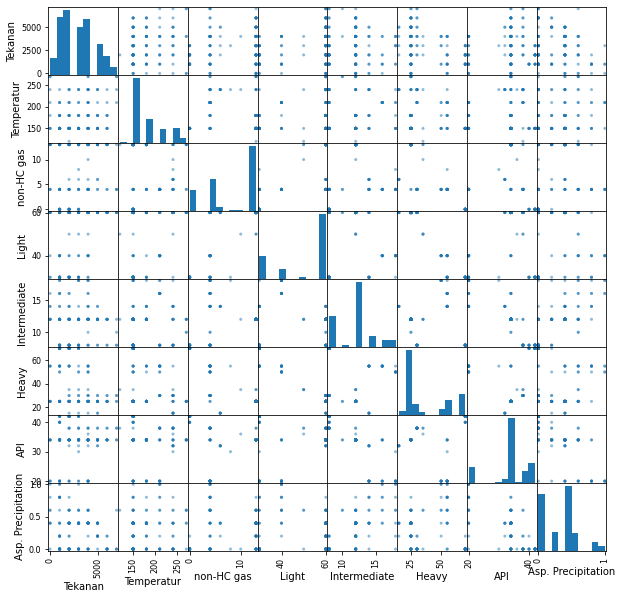

In [35]:
# Visualization data distribution

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(clean_data, figsize=[10,10])
plt.savefig('gambar1.png')
plt.show()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


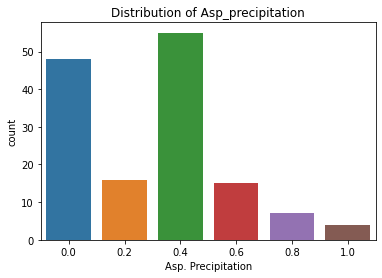

In [36]:
#visualization of target class
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(clean_data['Asp. Precipitation']).set_title('Distribution of Asp_precipitation')
plt.savefig('gambar10.png')
plt.show()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


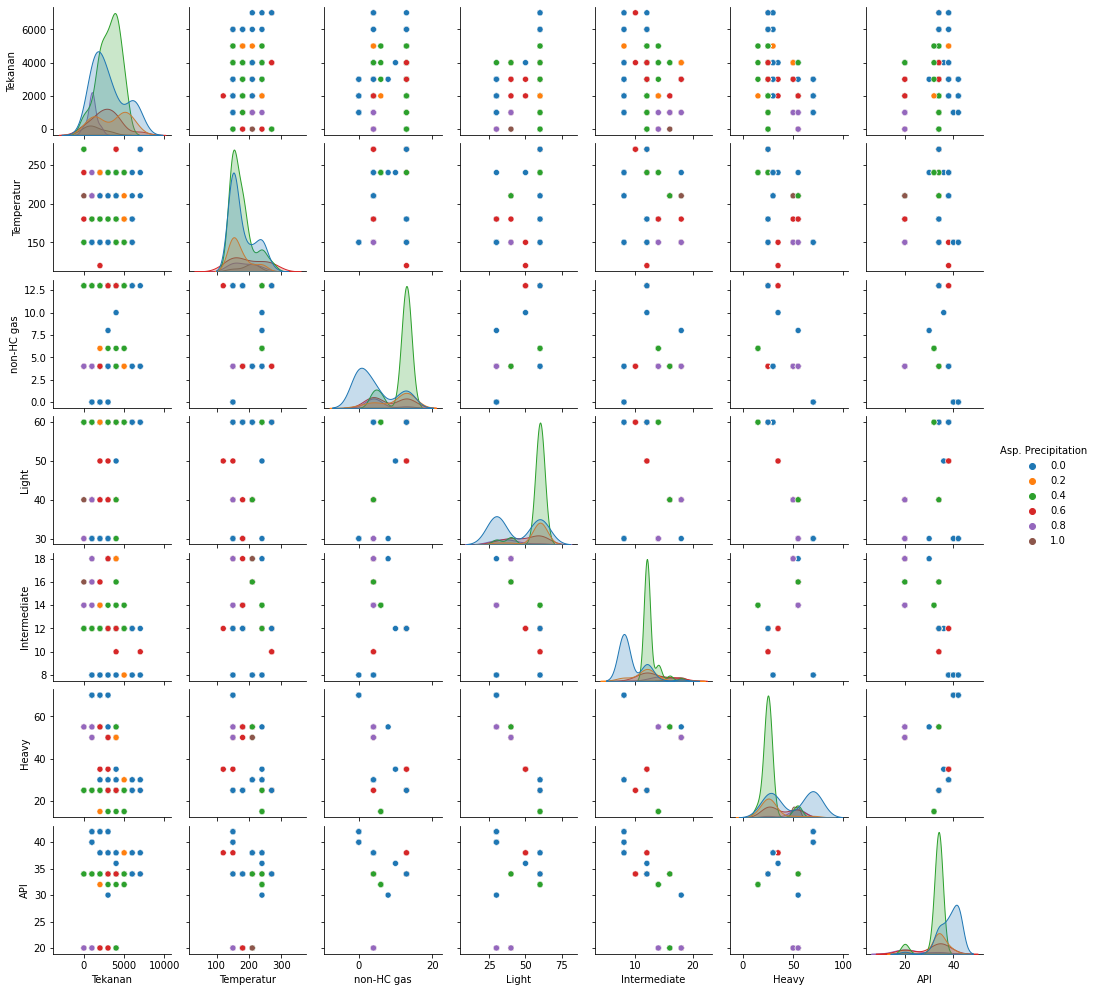

In [37]:
# visualization data distribution with class target
import seaborn as sns
atr_data = clean_data[['Tekanan', 'Temperatur','non-HC gas','Light','Intermediate','Heavy','API','Asp. Precipitation']]
distibusi_data = sns.pairplot(atr_data, hue='Asp. Precipitation', height=2, palette='tab10')
plt.savefig('gambar2.png')

## Make Bayesian Network model based on Perameter and Structure Learning from data

### Structure Learning
To learn model structure (a DAG) from a data set, there are two broad techniques:

* score-based structure learning
* constraint-based structure learning

### Score-based Structure Learning
This approach construes model selection as an optimization task. It has two building blocks:

* A scoring function $s_D\colon M \to \mathbb R$ that maps models to a numerical score, based on how well they fit to a given data set $D$.
* A search strategy to traverse the search space of possible models $M$ and select a model with optimal score.

#### Scoring functions
Commonly used scores to measure the fit between model and data are Bayesian Dirichlet scores such as BDeu or K2 and the Bayesian Information Criterion (BIC, also called MDL).

### HillClimbSearch(StructureEstimator):
Class for heuristic **hill climb** searches for DAGs, to learn network structure from data. `estimate` attempts to find a model with optimal score

### BDeuScore(StructureScore):
Class for Bayesian structure scoring for BayesianModels with Dirichlet priors. The BDeu score is the result of setting all Dirichlet hyperparameters/pseudo_counts to `equivalent_sample_size/variable_cardinality`. The `score`-method measures how well a model is able to describe the given data set.

In [38]:
from pgmpy.estimators import HillClimbSearch, BDeuScore

est = HillClimbSearch(clean_data)
best_model = est.estimate(scoring_method=BDeuScore(clean_data))
sorted(best_model.nodes())

  0%|                                                                          | 12/1000000 [00:01<26:44:21, 10.39it/s]


['API',
 'Asp. Precipitation',
 'Heavy',
 'Intermediate',
 'Light',
 'Tekanan',
 'Temperatur',
 'non-HC gas']

In [39]:
best_model.edges()

OutEdgeView([('Temperatur', 'Intermediate'), ('non-HC gas', 'Light'), ('Intermediate', 'Asp. Precipitation'), ('Intermediate', 'non-HC gas'), ('Intermediate', 'Light'), ('Heavy', 'Intermediate'), ('Heavy', 'non-HC gas'), ('Heavy', 'Light'), ('Heavy', 'Temperatur'), ('API', 'Heavy'), ('API', 'non-HC gas'), ('Asp. Precipitation', 'Tekanan')])

In [40]:
bdeu = BDeuScore(clean_data)
print(bdeu.score(best_model))

-993.4292295832028


In [90]:
Bs1=bdeu.local_score('Intermediate', parents=['Temperatur'])
print('Score dari hubungan (Temperatur, Intermediate) adalah {}'.format(Bs1))
Bs2=bdeu.local_score('Light', parents=['non-HC gas'])
print('Score dari hubungan (non-HC gas, Light) adalah {}'.format(Bs2))
Bs3=bdeu.local_score('Asp. Precipitation', parents=['Intermediate'])
print('Score dari hubungan (Intermediate, Asp. Precipitation) adalah {}'.format(Bs3))
Bs4=bdeu.local_score('Light', parents=['Intermediate'])
print('Score dari hubungan (Intermediate, Light) adalah {}'.format(Bs4))
Bs5=bdeu.local_score('non-HC gas', parents=['Intermediate'])
print('Score dari hubungan (Intermediate, non-HC gas) adalah {}'.format(Bs5))
Bs6=bdeu.local_score('Light', parents=['Intermediate'])
print('Score dari hubungan (Heavy, Intermediate) adalah {}'.format(Bs6))
Bs7=bdeu.local_score('Intermediate', parents=['Heavy'])
print('Score dari hubungan (Heavy, Intermediate) adalah {}'.format(Bs7))
Bs8=bdeu.local_score('non-HC gas', parents=['Heavy'])
print('Score dari hubungan (Heavy, non-HC gas) adalah {}'.format(Bs8))
Bs9=bdeu.local_score('Light', parents=['Heavy'])
print('Score dari hubungan (Heavy, Light) adalah {}'.format(Bs9))
Bs10=bdeu.local_score('Temperatur', parents=['Heavy'])
print('Score dari hubungan (Heavy, Temperatur) adalah {}'.format(Bs10))
Bs11=bdeu.local_score('Heavy', parents=['API'])
print('Score dari hubungan (API, Heavy) adalah {}'.format(Bs11))
Bs12=bdeu.local_score('non-HC gas', parents=['API'])
print('Score dari hubungan (API ,non-HC gas) adalah {}'.format(Bs12))
Bs13=bdeu.local_score('Tekanan', parents=['Asp. Precipitation'])
print('Score dari hubungan (Asp. Precipitatin, Tekanan) adalah {}'.format(Bs13))

Score dari hubungan (Temperatur, Intermediate) adalah -167.38854533304107
Score dari hubungan (non-HC gas, Light) adalah -71.84213425088927
Score dari hubungan (Intermediate, Asp. Precipitation) adalah -177.8455796439507
Score dari hubungan (Intermediate, Light) adalah -72.99159026964423
Score dari hubungan (Intermediate, non-HC gas) adalah -72.31754574518561
Score dari hubungan (Heavy, Intermediate) adalah -72.99159026964423
Score dari hubungan (Heavy, Intermediate) adalah -57.406680502592714
Score dari hubungan (Heavy, non-HC gas) adalah -47.77169317429773
Score dari hubungan (Heavy, Light) adalah -38.367415798899046
Score dari hubungan (Heavy, Temperatur) adalah -156.6498268117185
Score dari hubungan (API, Heavy) adalah -69.35832769104627
Score dari hubungan (API ,non-HC gas) adalah -59.054643135135436
Score dari hubungan (Asp. Precipitatin, Tekanan) adalah -288.06825250903563


### Constraint-based Structure Learning
A different, but quite straightforward approach to build a DAG from data is this:

1. Identify independencies in the data set using hypothesis tests
2. Construct DAG (pattern) according to identified independencies

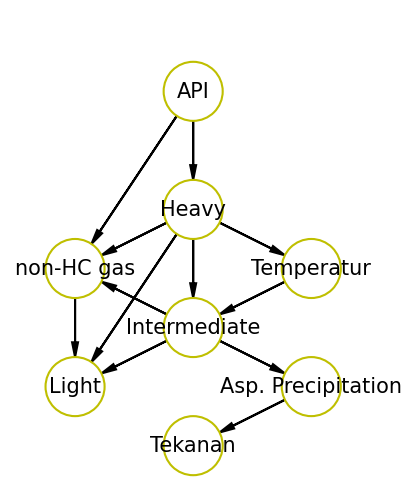

In [42]:
# Visualization Structure
import daft
from daft import PGM

pgm = PGM(shape=[3, 4], dpi=150, node_ec='y')

pgm.add_node(daft.Node('non-HC gas', r"non-HC gas", 2, 2.5, scale=1))
pgm.add_node(daft.Node('Light', r"Light", 2, 1.5, scale=1))
pgm.add_node(daft.Node('Intermediate', r"Intermediate", 3, 2, scale=1))
pgm.add_node(daft.Node('Heavy', r"Heavy", 3, 3, scale=1))
pgm.add_node(daft.Node('API', r"API", 3, 4, scale=1))
pgm.add_node(daft.Node('Tekanan', r"Tekanan", 3, 1, scale=1))
pgm.add_node(daft.Node('Temperatur', r"Temperatur", 4, 2.5, scale=1))
pgm.add_node(daft.Node('Asp. Precipitation', r"Asp. Precipitation", 4,1.5 , scale=1))

pgm.add_edge('Temperatur', 'Intermediate')
pgm.add_edge('non-HC gas', 'Light')
pgm.add_edge('Intermediate', 'Asp. Precipitation')
pgm.add_edge('Intermediate', 'non-HC gas')
pgm.add_edge('Intermediate', 'Light')
pgm.add_edge('Heavy', 'Intermediate')
pgm.add_edge('Heavy', 'non-HC gas')
pgm.add_edge('Heavy', 'Light')
pgm.add_edge('Heavy', 'Temperatur')
pgm.add_edge('API', 'Heavy')
pgm.add_edge('API', 'non-HC gas')
pgm.add_edge('Asp. Precipitation', 'Tekanan')

pgm.render()
plt.savefig('gambar3.png')
plt.show()

## Splitting Data Train Point 90%

In [43]:
#split into train test sets
from sklearn.model_selection import train_test_split
train_90, test_10 = train_test_split(clean_data, test_size=0.1, random_state=True)

In [44]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
Asp_model = BayesianModel(best_model.edges())
Asp_model.fit(train_90, estimator=BayesianEstimator)

In [45]:
Asp_model.local_independencies('Asp. Precipitation')

(Asp. Precipitation ⟂ non-HC gas, Heavy, Light, API, Temperatur | Intermediate)

In [46]:
Asp_model.get_independencies()

(Asp. Precipitation ⟂ API | Heavy)
(Asp. Precipitation ⟂ non-HC gas, Heavy, Light, API, Temperatur | Intermediate)
(Asp. Precipitation ⟂ Light, API, Heavy, Temperatur | non-HC gas, Intermediate)
(Asp. Precipitation ⟂ Light, non-HC gas, API, Temperatur | Heavy, Intermediate)
(Asp. Precipitation ⟂ API | Tekanan, Heavy)
(Asp. Precipitation ⟂ API | Heavy, Temperatur)
(Asp. Precipitation ⟂ non-HC gas, API, Heavy, Temperatur | Light, Intermediate)
(Asp. Precipitation ⟂ Light, non-HC gas, Heavy, Temperatur | API, Intermediate)
(Asp. Precipitation ⟂ non-HC gas, Heavy, Light, API, Temperatur | Tekanan, Intermediate)
(Asp. Precipitation ⟂ Light, non-HC gas, API, Heavy | Temperatur, Intermediate)
(Asp. Precipitation ⟂ Light, API, Temperatur | non-HC gas, Heavy, Intermediate)
(Asp. Precipitation ⟂ API, Heavy, Temperatur | Light, non-HC gas, Intermediate)
(Asp. Precipitation ⟂ Light, Heavy, Temperatur | non-HC gas, API, Intermediate)
(Asp. Precipitation ⟂ Light, API, Heavy, Temperatur | non-HC gas,

### Parameter Learning

In [47]:
#Conditional Probability Distributions
for cpd in Asp_model.get_cpds():
    print(cpd)

+-----------------+----------------------+-----------------------+----------------------+---------------------+----------------------+----------------------+----------------------+
| Heavy           | Heavy(15)            | Heavy(25)             | Heavy(30)            | Heavy(35)           | Heavy(50)            | Heavy(55)            | Heavy(70)            |
+-----------------+----------------------+-----------------------+----------------------+---------------------+----------------------+----------------------+----------------------+
| Temperatur(120) | 0.020833333333333336 | 0.0017325017325017322 | 0.009363295880149813 | 0.30128205128205127 | 0.020833333333333336 | 0.008090614886731391 | 0.005020080321285139 |
+-----------------+----------------------+-----------------------+----------------------+---------------------+----------------------+----------------------+----------------------+
| Temperatur(150) | 0.020833333333333336 | 0.5693000693000693    | 0.009363295880149813 | 0.301

### Parameter Learning Inference

In [48]:
test_data = test_10.drop('Asp. Precipitation', axis=1)
predict_model=Asp_model.predict(test_data)
predict_model

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 234.13it/s]


,Asp. Precipitation
0,0.8
1,0.2
2,1.0
3,0.0
4,0.4
5,0.8
6,0.4
7,0.4
8,0.0
9,0.2


In [49]:
test_actual_data=test_10['Asp. Precipitation']
test_actual_data.values

array([0.8, 0.4, 0.6, 0. , 0.4, 1. , 0.6, 0.4, 0. , 0.4, 0.2, 0.4, 0.4,
       0.4, 0.8])

In [50]:
predict=predict_model.values
Predict_reshape = predict.reshape(15,)
Predict_reshape

array([0.8, 0.2, 1. , 0. , 0.4, 0.8, 0.4, 0.4, 0. , 0.2, 0.4, 0.4, 0.4,
       0.4, 0.8])

In [51]:
# Accuracy score
accuracy = (Predict_reshape == test_actual_data).sum() / 15
print(accuracy)

0.6


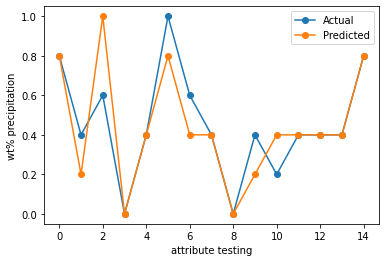

In [52]:
plt.plot(range(len(test_actual_data)), test_actual_data, label='Actual', marker='o')
plt.plot(range(len(Predict_reshape)), Predict_reshape, label='Predicted', marker='o')
plt.legend()
plt.xlabel('attribute testing')
plt.ylabel('wt% precipitation')
plt.savefig('gambar4.png')
plt.show()

### Inference

In [53]:
from pgmpy.inference import VariableElimination
Asp_infer = VariableElimination(Asp_model)

In [54]:
# elemen pada tiap variabel

for column in clean_data:
    elemen = np.unique(clean_data[column])
    total_elm = len(elemen)
    print('jumlah angka pada fitur {} :{} -- {}'.format(column,total_elm,elemen))

jumlah angka pada fitur Tekanan :8 -- [   0 1000 2000 3000 4000 5000 6000 7000]
jumlah angka pada fitur Temperatur :6 -- [120 150 180 210 240 270]
jumlah angka pada fitur non-HC gas :6 -- [ 0  4  6  8 10 13]
jumlah angka pada fitur Light :4 -- [30 40 50 60]
jumlah angka pada fitur Intermediate :6 -- [ 8 10 12 14 16 18]
jumlah angka pada fitur Heavy :7 -- [15 25 30 35 50 55 70]
jumlah angka pada fitur API :8 -- [20 30 32 34 36 38 40 42]
jumlah angka pada fitur Asp. Precipitation :6 -- [0.  0.2 0.4 0.6 0.8 1. ]


In [55]:
test_data

,Tekanan,Temperatur,non-HC gas,Light,Intermediate,Heavy,API
71,1000,180,4,30,14,55,20
97,1000,180,13,60,12,25,34
34,3000,150,4,40,18,50,20
167,2000,150,0,30,8,70,42
84,3000,150,13,60,12,25,34
17,1000,210,4,40,16,55,20
28,4000,180,4,40,18,50,20
138,5000,150,13,60,12,25,34
66,4000,210,4,60,8,30,38
122,1000,150,13,60,12,25,34


In [56]:
# Computing the probability of Asp. Precipitation given Light=10.
q = Asp_infer.query(variables=['Asp. Precipitation'], evidence={'Tekanan': 3000, 'Temperatur': 150,
                                                                'non-HC gas': 4, 'Light': 40, 'Intermediate': 18,
                                                                'Heavy': 50, 'API':20})
print(q)

# Computing the probability of API given Light=10.
q = Asp_infer.query(variables=['API'], evidence={'Light': 30, 'Intermediate':14})
print(q)

# Computing the probabilities (not joint) of bronc and asia given smoke=no
q = Asp_infer.query(variables=['Tekanan', 'Temperatur'], evidence={'Light': 30}, joint=False)
for factor in q.values():
    print(factor)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Eliminating: non-HC gas:   0%|                                                                   | 0/3 [00:00<?, ?it/s]


+-------------------------+---------------------------+
| Asp. Precipitation      |   phi(Asp. Precipitation) |
+=========================+===========================+
| Asp. Precipitation(0.0) |                    0.1645 |
+-------------------------+---------------------------+
| Asp. Precipitation(0.2) |                    0.0071 |
+-------------------------+---------------------------+
| Asp. Precipitation(0.4) |                    0.2022 |
+-------------------------+---------------------------+
| Asp. Precipitation(0.6) |                    0.0201 |
+-------------------------+---------------------------+
| Asp. Precipitation(0.8) |                    0.0194 |
+-------------------------+---------------------------+
| Asp. Precipitation(1.0) |                    0.5867 |
+-------------------------+---------------------------+


Finding Elimination Order: : 100%|██████████████████████████████████████████████████████| 5/5 [00:00<00:00, 269.56it/s]

Eliminating: Intermediate:   0%|                                                                 | 0/5 [00:00<?, ?it/s]

+---------+------------+
| API     |   phi(API) |
+=========+============+
| API(20) |     0.7752 |
+---------+------------+
| API(30) |     0.0382 |
+---------+------------+
| API(32) |     0.0046 |
+---------+------------+
| API(34) |     0.1393 |
+---------+------------+
| API(36) |     0.0082 |
+---------+------------+
| API(38) |     0.0155 |
+---------+------------+
| API(40) |     0.0078 |
+---------+------------+
| API(42) |     0.0111 |
+---------+------------+



Eliminating: Heavy: 100%|████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 82.59it/s]

+---------------+----------------+
| Tekanan       |   phi(Tekanan) |
+===============+================+
| Tekanan(0)    |         0.0401 |
+---------------+----------------+
| Tekanan(1000) |         0.2399 |
+---------------+----------------+
| Tekanan(2000) |         0.2212 |
+---------------+----------------+
| Tekanan(3000) |         0.1406 |
+---------------+----------------+
| Tekanan(4000) |         0.1142 |
+---------------+----------------+
| Tekanan(5000) |         0.0683 |
+---------------+----------------+
| Tekanan(6000) |         0.1228 |
+---------------+----------------+
| Tekanan(7000) |         0.0529 |
+---------------+----------------+
+-----------------+-------------------+
| Temperatur      |   phi(Temperatur) |
+=================+===================+
| Temperatur(120) |            0.0079 |
+-----------------+-------------------+
| Temperatur(150) |            0.8548 |
+-----------------+-------------------+
| Temperatur(180) |            0.0851 |
+--------------

In [57]:
# Computing the MAP of API given Light=10.
mq = Asp_infer.map_query(variables=['API'], evidence={'Light':30})
print(mq)

# Computing the MAP of Light and Heavy given Tekanan=5000
mq = Asp_infer.map_query(variables=['Light', 'Heavy'], evidence={'Tekanan':5000})
print(mq)

Finding Elimination Order: : 100%|██████████████████████████████████████████████████████| 4/4 [00:00<00:00, 449.23it/s]

Eliminating: Heavy: 100%|███████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 105.09it/s]


{'API': 42}


Finding Elimination Order: : 100%|██████████████████████████████████████████████████████| 5/5 [00:00<00:00, 357.12it/s]

Eliminating: Intermediate: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 68.10it/s]

{'Light': 60, 'Heavy': 25}


## Splitting Data Train Point 85%

In [58]:
train_85, test_15 = train_test_split(clean_data, test_size=0.15, random_state=True)

In [59]:
#fitting data train into model

Asp_model.fit(train_85, estimator=BayesianEstimator)

In [60]:
test_data2=test_15.drop('Asp. Precipitation', axis=1)
predict_mod2=Asp_model.predict(test_data2)
predict_mod2

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 45.70it/s]


,Asp. Precipitation
0,0.8
1,0.0
2,1.0
3,0.0
4,0.4
5,0.8
6,0.4
7,0.4
8,0.0
9,0.0


In [61]:
actual_data2=test_15['Asp. Precipitation']
actual_data2.values

array([0.8, 0.4, 0.6, 0. , 0.4, 1. , 0.6, 0.4, 0. , 0.4, 0.2, 0.4, 0.4,
       0.4, 0.8, 0.4, 0. , 0. , 0. , 0.4, 0. , 0.2])

In [62]:
pred2=predict_mod2.values
Pred_reshape2 = pred2.reshape(22,)
Pred_reshape2

array([0.8, 0. , 1. , 0. , 0.4, 0.8, 0.4, 0.4, 0. , 0. , 0.4, 0.4, 0.4,
       0.4, 0.8, 0.4, 0. , 0. , 0. , 0.4, 0. , 0. ])

In [63]:
accuracy2 = (Pred_reshape2 == actual_data2).sum() / 22
print(accuracy2)

0.6818181818181818


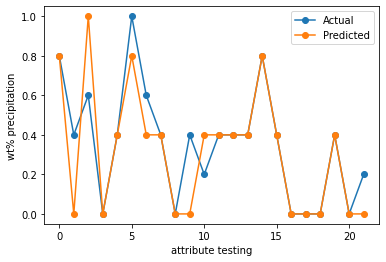

In [64]:
plt.plot(range(len(actual_data2)), actual_data2, label='Actual', marker='o')
plt.plot(range(len(Pred_reshape2)), Pred_reshape2, label='Predicted', marker='o')
plt.xlabel('attribute testing')
plt.ylabel('wt% precipitation')
plt.legend()
plt.savefig('gambar5.png')
plt.show()

## Splitting Data Train Point 80%

In [65]:
train_80, test_20 = train_test_split(clean_data, test_size=0.2, random_state=True)

In [66]:
Asp_model.fit(train_80, estimator=BayesianEstimator)

In [67]:
test_data3=test_20.drop('Asp. Precipitation', axis=1)
predict_mod3=Asp_model.predict(test_data3)
predict_mod3

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 61.33it/s]


,Asp. Precipitation
0,0.8
1,0.0
2,1.0
3,0.0
4,0.4
5,0.8
6,0.4
7,0.4
8,0.0
9,0.0


In [68]:
actual_data3=test_20['Asp. Precipitation']
actual_data3.values

array([0.8, 0.4, 0.6, 0. , 0.4, 1. , 0.6, 0.4, 0. , 0.4, 0.2, 0.4, 0.4,
       0.4, 0.8, 0.4, 0. , 0. , 0. , 0.4, 0. , 0.2, 0.6, 0.4, 0.4, 0. ,
       0.2, 0.2, 0.4])

In [69]:
pred3=predict_mod3.values
Pred_reshape3 = pred3.reshape(29,)
Pred_reshape3

array([0.8, 0. , 1. , 0. , 0.4, 0.8, 0.4, 0.4, 0. , 0. , 0.4, 0.4, 0.4,
       0.4, 0.8, 0.4, 0. , 0. , 0. , 0.4, 0. , 0. , 0.6, 0.4, 0.4, 0. ,
       0. , 0.4, 0.4])

In [70]:
accuracy3 = (Pred_reshape3 == actual_data3).sum() / 29
print(accuracy3)

0.6896551724137931


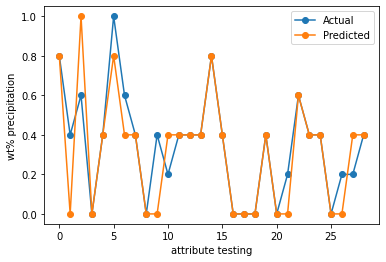

In [71]:
plt.plot(range(len(actual_data3)), actual_data3, label='Actual', marker='o')
plt.plot(range(len(Pred_reshape3)), Pred_reshape3, label='Predicted', marker='o')
plt.xlabel('attribute testing')
plt.ylabel('wt% precipitation')
plt.legend()
plt.savefig('gambar6.png')
plt.show()

## Splitting Data Train Point 75%

In [72]:
train_75, test_25 = train_test_split(clean_data, test_size=0.25, random_state=True)

In [73]:
Asp_model.fit(train_75, estimator=BayesianEstimator)

In [74]:
test_data4=test_25.drop('Asp. Precipitation', axis=1)
predict_mod4=Asp_model.predict(test_data4)
predict_mod4

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 33.43it/s]


,Asp. Precipitation
0,0.0
1,0.0
2,1.0
3,0.0
4,0.4
5,0.8
6,0.4
7,0.4
8,0.0
9,0.0


In [75]:
actual_data4=test_25['Asp. Precipitation']
actual_data4.values

array([0.8, 0.4, 0.6, 0. , 0.4, 1. , 0.6, 0.4, 0. , 0.4, 0.2, 0.4, 0.4,
       0.4, 0.8, 0.4, 0. , 0. , 0. , 0.4, 0. , 0.2, 0.6, 0.4, 0.4, 0. ,
       0.2, 0.2, 0.4, 0.8, 0. , 0.2, 0.4, 0.4, 1. , 0.4, 0. ])

In [76]:
pred4=predict_mod4.values
Pred_reshape4 = pred4.reshape(37,)
Pred_reshape4

array([0. , 0. , 1. , 0. , 0.4, 0.8, 0.4, 0.4, 0. , 0. , 0.4, 0.4, 0.4,
       0.4, 0. , 0.4, 0. , 0. , 0. , 0.4, 0. , 0. , 0.6, 0.4, 0.4, 0. ,
       0. , 0.4, 0.4, 0.6, 0. , 0. , 0.4, 0.4, 0.8, 0.4, 0. ])

In [77]:
accuracy4 = (Pred_reshape4 == actual_data4).sum() / 37
print(accuracy4)

0.6216216216216216


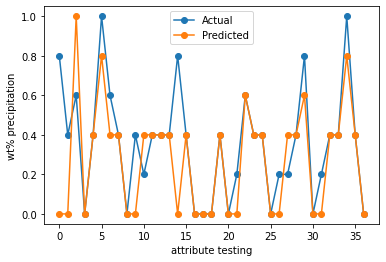

In [78]:
plt.plot(range(len(actual_data4)), actual_data4, label='Actual', marker='o')
plt.plot(range(len(Pred_reshape4)), Pred_reshape4, label='Predicted', marker='o')
plt.xlabel('attribute testing')
plt.ylabel('wt% precipitation')
plt.legend()
plt.savefig('gambar7.png')
plt.show()

## Splitting Data Train Point 70%

In [79]:
train_70, test_30 = train_test_split(clean_data, test_size=0.3, random_state=True)

In [80]:
Asp_model.fit(train_70, estimator=BayesianEstimator)

In [81]:
test_data5=test_30.drop('Asp. Precipitation', axis=1)
predict_mod5=Asp_model.predict(test_data5)
predict_mod5

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 28.83it/s]


,Asp. Precipitation
0,0.0
1,0.0
2,1.0
3,0.0
4,0.4
5,0.8
6,0.4
7,0.4
8,0.0
9,0.0


In [82]:
actual_data5=test_30['Asp. Precipitation']
actual_data5.values

array([0.8, 0.4, 0.6, 0. , 0.4, 1. , 0.6, 0.4, 0. , 0.4, 0.2, 0.4, 0.4,
       0.4, 0.8, 0.4, 0. , 0. , 0. , 0.4, 0. , 0.2, 0.6, 0.4, 0.4, 0. ,
       0.2, 0.2, 0.4, 0.8, 0. , 0.2, 0.4, 0.4, 1. , 0.4, 0. , 0. , 0.4,
       0.8, 1. , 0.4, 0.4, 0. ])

In [83]:
pred5=predict_mod5.values
Pred_reshape5 = pred5.reshape(44,)
Pred_reshape5

array([0. , 0. , 1. , 0. , 0.4, 0.8, 0.4, 0.4, 0. , 0. , 0.4, 0.4, 0.4,
       0.4, 0. , 0.4, 0. , 0. , 0. , 0.4, 0. , 0. , 0.6, 0.4, 0.4, 0. ,
       0. , 0.6, 0.4, 0.6, 0. , 0. , 0.4, 0.4, 0. , 0.4, 0. , 0. , 0.4,
       0. , 0.6, 0.4, 0.6, 0. ])

In [84]:
accuracy5 = (Pred_reshape5 == actual_data5).sum() / 44
print(accuracy5)

0.6136363636363636


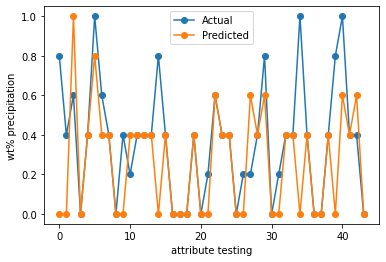

In [85]:
plt.plot(range(len(actual_data5)), actual_data5, label='Actual', marker='o')
plt.plot(range(len(Pred_reshape5)), Pred_reshape5, label='Predicted', marker='o')
plt.xlabel('attribute testing')
plt.ylabel('wt% precipitation')
plt.legend()
plt.savefig('gambar8.png')
plt.show()

## Visualization Accuration

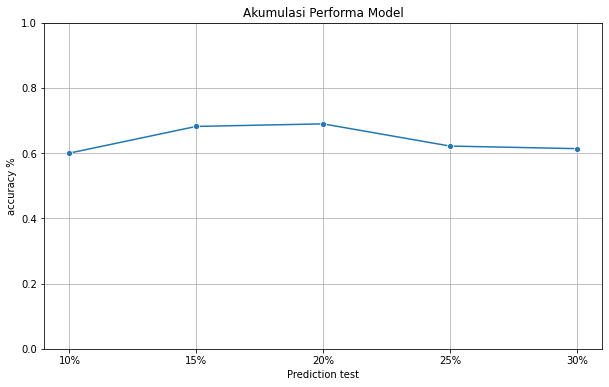

In [86]:
x = ['10%','15%','20%','25%','30%']
y = [accuracy, accuracy2, accuracy3, accuracy4, accuracy5]

plt.figure(figsize=(10,6))
sns.lineplot(x=x, y=y, marker='o')
sns.color_palette('Set2')
plt.title("Akumulasi Performa Model")
plt.xlabel("Prediction test")
plt.ylabel("accuracy %")
plt.grid()
plt.ylim(0,1)
plt.savefig('gambar9.png')
plt.show()